In [34]:
import numpy as np
import json
from sklearn.feature_extraction import text

x = open('fedpapers_split.txt').read()
papers = json.loads(x)

papersH = papers[0] # papers by Hamilton 
papersM = papers[1] # papers by Madison
papersD = papers[2] # disputed papers

nH, nM, nD = len(papersH), len(papersM), len(papersD)

# This allows you to ignore certain common words in English
# You may want to experiment by choosing the second option or your own
# list of stop words, but be sure to keep 'HAMILTON' and 'MADISON' in
# this list at a minimum, as their names appear in the text of the papers
# and leaving them in could lead to unpredictable results
stop_words = text.ENGLISH_STOP_WORDS.union({'HAMILTON','MADISON'})
#stop_words = {'HAMILTON','MADISON'}

## Form bag of words model using words used at least 10 times
vectorizer = text.CountVectorizer(stop_words,min_df=10)
X = vectorizer.fit_transform(papersH+papersM+papersD).toarray()

# Uncomment this line to see the full list of words remaining after filtering out 
# stop words and words used less than min_df times
print(len(vectorizer.vocabulary_))
#print((X.shape))
# Split word counts into separate matrices
XH, XM, XD = X[:nH,:], X[nH:nH+nM,:], X[nH+nM:,:]

# Estimate probability of each word in vocabulary being used by Hamilton
#calculating probablity of each word with the help of row sum of all matrices (cause each matrix has different size)
fH = np.sum(XH,axis=0)/(np.sum(XH,axis=0)+np.sum(XM,axis=0)+np.sum(XD,axis=0))

# Estimate probability of each word in vocabulary being used by Madison
#fM = XM/(XH+XM+XD)
fM = np.sum(XM,axis=0)/(np.sum(XH,axis=0)+np.sum(XM,axis=0)+np.sum(XD,axis=0) )
#print(fH,fM)
# Compute ratio of these probabilities
fratio = fH/fM
#print(fratio)
# Compute prior probabilities 
#computing prior probablities using count of Hamiltion written essays with total count of essay and similarly for Madison.
piH = XH.shape[0]/X.shape[0]
piM = XM.shape[0]/X.shape[0]
#print(piH,piM)
for xd in XD: # Iterate over disputed documents
    print(xd)
    # Compute likelihood ratio for Naive Bayes model
    #LR = ???
    #if LR>0.5:
     #   print 'Hamilton'
    #else:
     #   print 'Madison'
    

1515
[0 1 0 ... 0 1 0]
[0 1 0 ... 0 2 0]
[0 1 0 ... 0 1 0]
[0 1 0 ... 1 2 1]
[0 1 0 ... 0 1 1]
[0 1 0 ... 0 3 0]
[0 1 0 ... 0 2 0]
[0 1 0 ... 0 1 0]
[0 1 0 ... 0 5 1]
[0 1 0 ... 1 1 0]
[0 1 0 ... 1 1 0]
[0 1 0 ... 0 1 0]


C:\aacoda\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide


C:\aacoda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


1


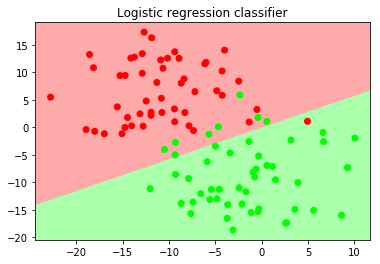

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets 
from math import exp

# the logistic function
def logistic_func(theta, x):
    t = x.dot(theta)
    g = np.zeros(t.shape)
    # split into positive and negative to improve stability
    g[t>=0.0] = 1.0 / (1.0 + np.exp(-t[t>=0.0])) 
    g[t<0.0] = np.exp(t[t<0.0]) / (np.exp(t[t<0.0])+1.0)
    return g

# function to compute log-likelihood
def neg_log_like(theta, x, y):
    g = logistic_func(theta,x)
    return -sum(np.log(g[y>0.5])) - sum(np.log(1-g[y<0.5]))

# function to compute the gradient of the negative log-likelihood
def log_grad(theta, x, y):
    g = logistic_func(theta,x)
    return -x.T.dot(y-g)
    
# implementation of gradient descent for logistic regression
def grad_desc(theta, x, y, alpha, tol, maxiter):
    nll_vec = []
    nll_vec.append(neg_log_like(theta, x, y))
    nll_delta = 2.0*tol
    iter = 0
    while (nll_delta > tol) and (iter < maxiter):
        theta = theta - (alpha * log_grad(theta, x, y)) 
        nll_vec.append(neg_log_like(theta, x, y))
        nll_delta = nll_vec[-2]-nll_vec[-1]
        iter += 1
    print(iter)
    return theta, np.array(nll_vec)

# function to compute output of LR classifier
def lr_predict(theta,x):
    # form Xtilde for prediction
    shape = x.shape
    Xtilde = np.zeros((shape[0],shape[1]+1))
    Xtilde[:,0] = np.ones(shape[0])
    Xtilde[:,1:] = x
    return logistic_func(theta,Xtilde)

## Generate dataset    
np.random.seed(2017) # Set random seed so results are repeatable
x,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=6.0)

## build classifier
# form Xtilde
shape = x.shape
xtilde = np.zeros((shape[0],shape[1]+1))
xtilde[:,0] = np.ones(shape[0])
xtilde[:,1:] = x

# Initialize theta to zero
theta = np.zeros(shape[1]+1)

# Run gradient descent
alpha = 1.0
tol = 1e-3
maxiter = 1000
theta,cost = grad_desc(theta,xtilde,y,alpha,tol,maxiter)

## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (x[:, 0].max() - x[:, 0].min())*0.05 # add 5% white space to border
y_delta = (x[:, 1].max() - x[:, 1].min())*0.05
x_min, x_max = x[:, 0].min() - x_delta, x[:, 0].max() + x_delta
y_min, y_max = x[:, 1].min() - y_delta, x[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr_predict(theta,np.c_[xx.ravel(), yy.ravel()])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
#print(iter)
## Show the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression classifier")
plt.show()